# Learning Statistics with R - Linear Regression

# What is a linear regression model?

fit data to:
$$
y = mx + b
$$

or: 

$$
\hat Y_i = b_1 X_i + b_0
$$

residuals:
$$
\epsilon_i = Y_i - \hat Y_i
$$

so:

$$
Y_i = b_1 X_i + b_0 + \epsilon_i
$$

# Estimating a linear regression model

ordinary least squares regression - minimize the average of the squares of the residuals

**Using the lm() function**

In [1]:
load("parenthood.Rdata")

In [2]:
regression.1 <- lm(formula=dan.grump~dan.sleep,
                   data=parenthood)
print(regression.1)


Call:
lm(formula = dan.grump ~ dan.sleep, data = parenthood)

Coefficients:
(Intercept)    dan.sleep  
    125.956       -8.937  



# Multiple linear regression


$$
Y_i = b_2 X_{i2} + b_1 X_{i1} + b_0 + \epsilon_i
$$

In [3]:
regression.2 <- lm(formula = dan.grump ~ dan.sleep + baby.sleep, data=parenthood)
print(regression.2)


Call:
lm(formula = dan.grump ~ dan.sleep + baby.sleep, data = parenthood)

Coefficients:
(Intercept)    dan.sleep   baby.sleep  
  125.96557     -8.95025      0.01052  



# Quantifying the fit of the regression model

**The $R^2$ value**value

$$
\text{SS}_{res} = \sum_i (Y_i - \hat Y_i)^2
$$

$$
\text{SS}_{tot} = \sum_i (Y_i - \bar Y)^2
$$

In [4]:
X <- parenthood$dan.sleep # predictor
Y <- parenthood$dan.grump # outcome 

# make predictions
Y.pred <- -8.94 * X + 125.97

# squared residuals
SS.resid <- sum( (Y-Y.pred)^2 )
print(SS.resid)

SS.tot <- sum( (Y - mean(Y))^2 )
print(SS.tot)

[1] 1838.722
[1] 9998.59


convert these residuals into an easily interpretable number

1 = no errors

0 = no different than guessing

$$
R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}}
$$

In [5]:
R.squared <- 1 - (SS.resid/SS.tot)
print(R.squared)

[1] 0.8161018


Porportion of the variance that can be accounted for by the predictor

So our predictor explains 81.6% of the variance

**The relationship between regression and correlation**

In [6]:
r <- cor(X, Y) 
print( r^2 )

[1] 0.8161027


the $R^2$ score is identical to the pearson correlation with one predictor

**The adjusted $R^2$ value**

adding predictors will always cause the $R^2$ value to increase (or stay the same). 

fix:<br> 
for K perdictors and N  observations:

$$
\text{adj.} R^2 = 1 - ( \frac{\text{SS}_{res}}{\text{SS}_{tot}} \times \frac{N-1}{N-K-1})
$$

attempts to account for degrees of freedom

# Hypothesis tests for regression models

- test whether the regression model is performing better than a null model
- test whether a particular regression coefficient is significantly different from 0

**Testing the model as a whole**<br> 

$$
H_0: Y_i = b_0 + \epsilon_i
$$

$$
H_1: Y_i = (\sum_{k=1}^K b_k X_{ik}) + b_0 + \epsilon_i
$$

divide up the total variance into residual variance and regression model variance<br> 

$$
\text{SS}_{mod} = \text{SS}_{tot} - \text{SS}_{res}
$$

convert to mean squares by dividing by degrees of freedom

$$
\text{MS}_{mod} = \frac{\text{SS}_{mod}}{df_{mod}}
$$

$$
\text{MS}_{res} = \frac{\text{SS}_{res}}{df_{res}}
$$

$$
df_{mod} = K
$$

$$
df_{res} = N-K-1
$$

now calculate an F statistic and run an F-test

$$
F = \frac{\text{MS}_{mod}}{\text{MS}_{res}}
$$

**Tests for individual coefficients**

In [7]:
print(regression.2)


Call:
lm(formula = dan.grump ~ dan.sleep + baby.sleep, data = parenthood)

Coefficients:
(Intercept)    dan.sleep   baby.sleep  
  125.96557     -8.95025      0.01052  



Does the baby.sleep coefficient really play any part in determining grump? 

hypotheses:

$$
H_0: b = 0
$$
$$
H_1: b \neq 0
$$

guess that the sampling distribution of $\hat b$ is normal with mean centered on b. if the null were true, then $\hat b$ has a mean 0 and unknown std- so use a t-test!

$$
t = \frac{\hat b}{\text{SE}(\hat b)}
$$

$$
df = N-K-1
$$

estimate of standard error is ugly. 

**Running the hypothesis test in R**

In [8]:
summary(regression.2)


Call:
lm(formula = dan.grump ~ dan.sleep + baby.sleep, data = parenthood)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0345  -2.2198  -0.4016   2.6775  11.7496 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 125.96557    3.04095  41.423   <2e-16 ***
dan.sleep    -8.95025    0.55346 -16.172   <2e-16 ***
baby.sleep    0.01052    0.27106   0.039    0.969    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.354 on 97 degrees of freedom
Multiple R-squared:  0.8161,	Adjusted R-squared:  0.8123 
F-statistic: 215.2 on 2 and 97 DF,  p-value: < 2.2e-16


Note: this function used several t-tests without any correction to p-value

## Testing the significance of a correlation

**Hypothesis test for a single correlation**

In [9]:
summary(regression.1)


Call:
lm(formula = dan.grump ~ dan.sleep, data = parenthood)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.025  -2.213  -0.399   2.681  11.750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 125.9563     3.0161   41.76   <2e-16 ***
dan.sleep    -8.9368     0.4285  -20.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.332 on 98 degrees of freedom
Multiple R-squared:  0.8161,	Adjusted R-squared:  0.8142 
F-statistic: 434.9 on 1 and 98 DF,  p-value: < 2.2e-16


In [10]:
cor.test(x=parenthood$dan.sleep, y=parenthood$dan.grump)


	Pearson's product-moment correlation

data:  parenthood$dan.sleep and parenthood$dan.grump
t = -20.854, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9340614 -0.8594714
sample estimates:
      cor 
-0.903384 


these two are exactly the same test

**Hypothesis test for all pairwise correlations**

cor.test() won't work on multiple pairs of variables becuase running many hypothesis tests is dangerous

correlate() in lsr package will apply corrections to p values

In [11]:
library(lsr)
correlate(parenthood, test=TRUE)

,dan.sleep,baby.sleep,dan.grump,day
dan.sleep,NA,0.62794934,-0.90338404,-0.09840768
baby.sleep,0.62794934,NA,-0.56596373,-0.01043394
dan.grump,-0.90338404,-0.56596373,NA,0.07647926
day,-0.09840768,-0.01043394,0.07647926,NA
,dan.sleep,baby.sleep,dan.grump,day
dan.sleep,NA,1.348133e-11,4.905856e-37,0.9900633
baby.sleep,1.348133e-11,NA,3.379004e-09,0.9900633
dan.grump,4.905856e-37,3.379004e-09,NA,0.9900633
day,9.900633e-01,9.900633e-01,9.900633e-01,NA
,dan.sleep,baby.sleep,dan.grump,day


# Regarding regression coefficients

**Confidence intervals for the coefficients**

construct them in the usual way:

$$
\text{CI}(b) = \hat b \pm (t_{crit} \times \text{SE}(\hat b))
$$

use `confint()` function

In [12]:
confint(
    object=regression.2, # regression model
    # parm - vector indicating which coefficients to get the interval for, default = all
    level=0.99,
)

,0.5 %,99.5 %
(Intercept),117.9755724,133.9555593
dan.sleep,-10.4044419,-7.4960575
baby.sleep,-0.7016868,0.7227357


**Calculating standardized regression coefficients**

get all dependent variables on the same scale. These are the coefficients we would have obtained if we converted all the variables to z-scores before doing the regression. 

$$
\beta_X = b_x \times \frac{\sigma_X}{\sigma_Y}
$$

can use `standardCoefs()` function in lsr package

In [13]:
standardCoefs(regression.2)

,b,beta
dan.sleep,-8.95024973,-0.90474809
baby.sleep,0.01052447,0.00217223


## Assumptions of regression

- residuals are normally distributed
- the relationship between X and Y is actually linear
- each residual is generated from the same normal distribution with mean 0 and some variance. We want the standard deviation of the residual to be the same for all values of $\hat Y$ and all values of every predictor $X$
- Uncorrelated predictors- we don't want the predictors to be too strongly correlated in a multiple regression model (collinearity)
- Residuals are independent of each other
- No "bad" outliers

## Model checking

This is known as **Regression diagnostics**<br> 

**3 kinds of residuals**

- ordinary residuals: $\epsilon_i = Y_i - \hat Y_i$
- standardised residuals: normalize to have std of 1: $\epsilon_i` = \frac{\epsilon_i}{\hat \sigma \sqrt{1-h_i}}$($\hat \sigma$ = estimated pop std fo ordinary residuals, $h_i$ = 'hat value' of observation (not covered yet)
- studentised residuals: $\epsilon_i` = \frac{\epsilon_i}{\hat \sigma_{(-i)} \sqrt{1-h_i}}$, $\hat \sigma_{(-i)}$ = estimate of std if you had eleminated that observation from the dataset

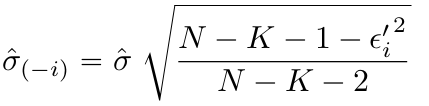

- pearson residual (identical to ordinary residual for our purposes)

In [14]:
# ordinary residuals
residuals(object=regression.2)

1           2           3           4           5           6 
 -2.1403095   4.7081942   1.9553640  -2.0602806   0.7194888  -0.4066133 
          7           8           9          10          11          12 
  0.2269987  -1.7003077   0.2025039   3.8524589   3.9986291  -4.9120150 
         13          14          15          16          17          18 
  1.2060134   0.4946578  -2.6579276  -0.3966805   3.3538613   1.7261225 
         19          20          21          22          23          24 
 -0.4922551  -5.6405941  -0.4660764   2.7238389   9.3653697   0.2841513 
         25          26          27          28          29          30 
 -0.5037668  -1.4941146   8.1328623   1.9787316  -1.5126726   3.5171148 
         31          32          33          34          35          36 
 -8.9256951  -2.8282946   6.1030349  -7.5460717   4.5572128 -10.6510836 
         37          38          39          40          41          42 
 -5.6931846   6.3096506  -2.1082466  -0.5044253   0.1875576   4.8094841 
         43          44          45          46          47          48 
 -5.4135163  -6.2292842  -4.5725232  -5.3354601   3.9950111   2.1718745 
         49          50          51          52          53          54 
 -3.4766440   0.4834367   6.2839790   2.0109396  -1.5846631  -2.2166613 
         55          56          57          58          59          60 
  2.2033140   1.9328736  -1.8301204  -1.5401430   2.5298509  -3.3705782 
         61          62          63          64          65          66 
 -2.9380806   0.6590736  -0.5917559  -8.6131971   5.9781035   5.9332979 
         67          68          69          70          71          72 
 -1.2341956   3.0047669  -1.0802468   6.5174672  -3.0155469   2.1176720 
         73          74          75          76          77          78 
  0.6058757  -2.7237421  -2.2291472  -1.4053822   4.7461491  11.7495569 
         79          80          81          82          83          84 
  4.7634141   2.6620908 -11.0345292  -0.7588667   1.4558227  -0.4745727 
         85          86          87          88          89          90 
  8.9091201  -1.1409777   0.7555223  -0.4107130   0.8797237  -1.4095586 
         91          92          93          94          95          96 
  3.1571385  -3.4205757  -5.7228699  -2.2033958  -3.8647891   0.4982711 
         97          98          99         100 
 -5.5249495   4.1134221  -8.2038533   5.6800859

In [15]:
# standardised residuals
rstandard(model=regression.2)

1           2           3           4           5           6 
-0.49675845  1.10430571  0.46361264 -0.47725357  0.16756281 -0.09488969 
          7           8           9          10          11          12 
 0.05286626 -0.39260381  0.04739691  0.89033990  0.95851248 -1.13898701 
         13          14          15          16          17          18 
 0.28047841  0.11519184 -0.61657092 -0.09191865  0.77692937  0.40403495 
         19          20          21          22          23          24 
-0.11552373 -1.31540412 -0.10819238  0.62951824  2.17129803  0.06586227 
         25          26          27          28          29          30 
-0.11980449 -0.34704024  1.91121833  0.45686516 -0.34986350  0.81233165 
         31          32          33          34          35          36 
-2.08659993 -0.66317843  1.42930082 -1.77763064  1.07452436 -2.47385780 
         37          38          39          40          41          42 
-1.32715114  1.49419658 -0.49115639 -0.11674947  0.04401233  1.11881912 
         43          44          45          46          47          48 
-1.27081641 -1.46422595 -1.06943700 -1.24659673  0.94152881  0.51069809 
         49          50          51          52          53          54 
-0.81373349  0.11412178  1.47938594  0.46437962 -0.37157009 -0.51609949 
         55          56          57          58          59          60 
 0.51800753  0.44813204 -0.42662358 -0.35575611  0.58403297 -0.78022677 
         61          62          63          64          65          66 
-0.67833325  0.15484699 -0.13760574 -2.05662232  1.40238029  1.37505125 
         67          68          69          70          71          72 
-0.28964989  0.69497632 -0.24945316  1.50709623 -0.69864682  0.49071427 
         73          74          75          76          77          78 
 0.14267297 -0.63246560 -0.51972828 -0.32509811  1.10842574  2.72171671 
         79          80          81          82          83          84 
 1.09975101  0.62057080 -2.55172097 -0.17584803  0.34340064 -0.11158952 
         85          86          87          88          89          90 
 2.10863391 -0.26386516  0.17624445 -0.09504416  0.20450884 -0.32730740 
         91          92          93          94          95          96 
 0.73475640 -0.79400855 -1.32768248 -0.51940736 -0.91512580  0.11661226 
         97          98          99         100 
-1.28069115  0.96332849 -1.90290258  1.31368144

In [16]:
# studentised residuals
rstudent(model=regression.2)

1           2           3           4           5           6 
-0.49482102  1.10557030  0.46172854 -0.47534555  0.16672097 -0.09440368 
          7           8           9          10          11          12 
 0.05259381 -0.39088553  0.04715251  0.88938019  0.95810710 -1.14075472 
         13          14          15          16          17          18 
 0.27914212  0.11460437 -0.61459001 -0.09144760  0.77533036  0.40228555 
         19          20          21          22          23          24 
-0.11493461 -1.32043609 -0.10763974  0.62754813  2.21456485  0.06552336 
         25          26          27          28          29          30 
-0.11919416 -0.34546127  1.93818473  0.45499388 -0.34827522  0.81089646 
         31          32          33          34          35          36 
-2.12403286 -0.66125192  1.43712830 -1.79797263  1.07539064 -2.54258876 
         37          38          39          40          41          42 
-1.33244515  1.50388257 -0.48922682 -0.11615428  0.04378531  1.12028904 
         43          44          45          46          47          48 
-1.27490649 -1.47302872 -1.07023828 -1.25020935  0.94097261  0.50874322 
         49          50          51          52          53          54 
-0.81230544  0.11353962  1.48863006  0.46249410 -0.36991317 -0.51413868 
         55          56          57          58          59          60 
 0.51604474  0.44627831 -0.42481754 -0.35414868  0.58203894 -0.77864171 
         61          62          63          64          65          66 
-0.67643392  0.15406579 -0.13690795 -2.09211556  1.40949469  1.38147541 
         67          68          69          70          71          72 
-0.28827768  0.69311245 -0.24824363  1.51717578 -0.69679156  0.48878534 
         73          74          75          76          77          78 
 0.14195054 -0.63049841 -0.51776374 -0.32359434  1.10974786  2.81736616 
         79          80          81          82          83          84 
 1.10095270  0.61859288 -2.62827967 -0.17496714  0.34183379 -0.11101996 
         85          86          87          88          89          90 
 2.14753375 -0.26259576  0.17536170 -0.09455738  0.20349582 -0.32579584 
         91          92          93          94          95          96 
 0.73300184 -0.79248469 -1.33298848 -0.51744314 -0.91435205  0.11601774 
         97          98          99         100 
-1.28498273  0.96296745 -1.92942389  1.31867548

**Three kinds of anomalous data**<br> 

- outlier: something that is very different from what your model predicts (very large studentised residual). Could mean junk data or some other defect OR something to look more into
- leverage: an observation is very different from all other observations. use hat value- measure to the extend to whihc the i-th observation is in control of where the regression line ends up going. Worth looking into, but less of a cause for concern unless they're also outliers.

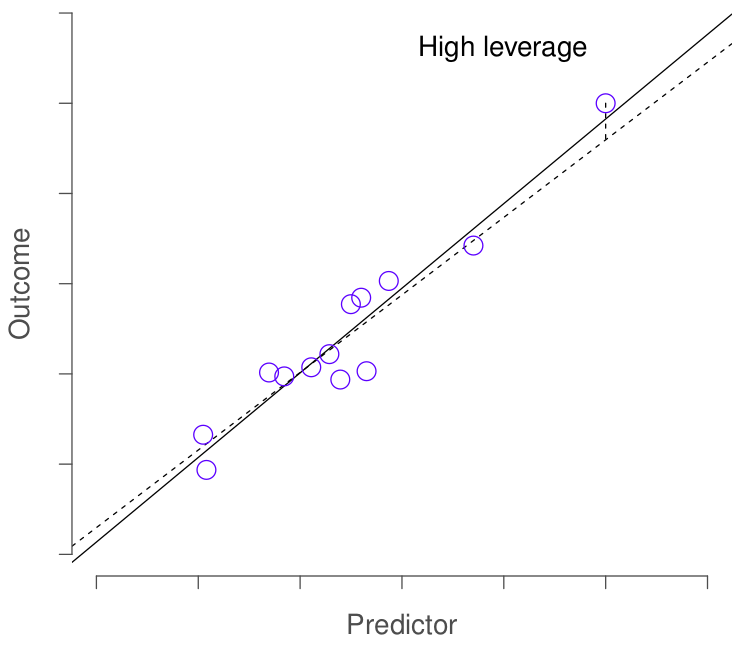

- influence- outlier that has a high leverage

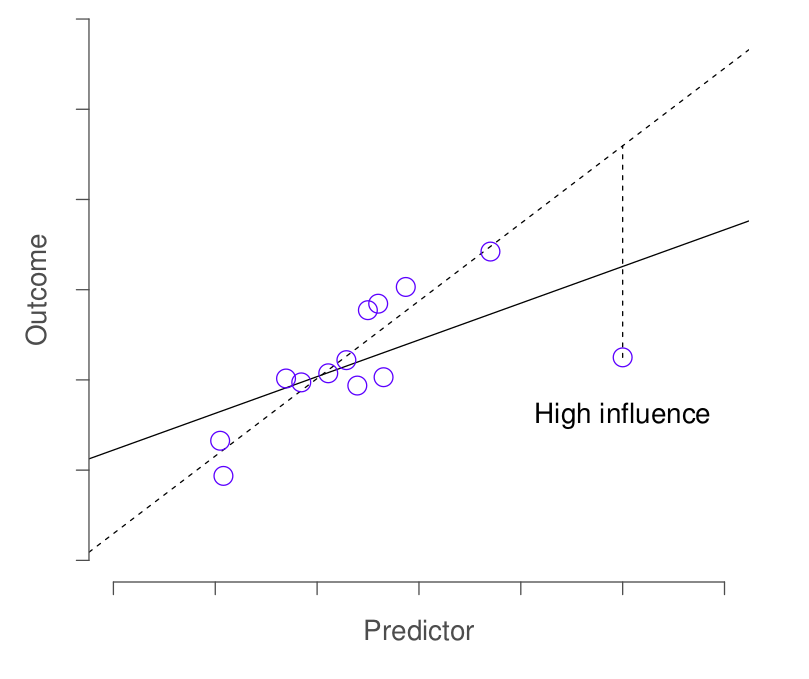

measure using cook's distance 

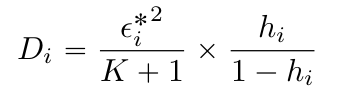

in general, large if > 1 or > 4/N

In [17]:
# get hat values
hatvalues(model=regression.2)

1          2          3          4          5          6          7 
0.02067452 0.04105320 0.06155445 0.01685226 0.02734865 0.03129943 0.02735579 
         8          9         10         11         12         13         14 
0.01051224 0.03698976 0.01229155 0.08189763 0.01882551 0.02462902 0.02718388 
        15         16         17         18         19         20         21 
0.01964210 0.01748592 0.01691392 0.03712530 0.04213891 0.02994643 0.02099435 
        22         23         24         25         26         27         28 
0.01233280 0.01853370 0.01804801 0.06722392 0.02214927 0.04472007 0.01039447 
        29         30         31         32         33         34         35 
0.01381812 0.01105817 0.03468260 0.04048248 0.03814670 0.04934440 0.05107803 
        36         37         38         39         40         41         42 
0.02208177 0.02919013 0.05928178 0.02799695 0.01519967 0.04195751 0.02514137 
        43         44         45         46         47         48         49 
0.04267879 0.04517340 0.03558080 0.03360160 0.05019778 0.04587468 0.03701290 
        50         51         52         53         54         55         56 
0.05331282 0.04814477 0.01072699 0.04047386 0.02681315 0.04556787 0.01856997 
        57         58         59         60         61         62         63 
0.02919045 0.01126069 0.01012683 0.01546412 0.01029534 0.04428870 0.02438944 
        64         65         66         67         68         69         70 
0.07469673 0.04135090 0.01775697 0.04217616 0.01384321 0.01069005 0.01340216 
        71         72         73         74         75         76         77 
0.01716361 0.01751844 0.04863314 0.02158623 0.02951418 0.01411915 0.03276064 
        78         79         80         81         82         83         84 
0.01684599 0.01028001 0.02920514 0.01348051 0.01752758 0.05184527 0.04583604 
        85         86         87         88         89         90         91 
0.05825858 0.01359644 0.03054414 0.01487724 0.02381348 0.02159418 0.02598661 
        92         93         94         95         96         97         98 
0.02093288 0.01982480 0.05063492 0.05907629 0.03682026 0.01817919 0.03811718 
        99        100 
0.01945603 0.01373394

In [18]:
# calculate cooks distances
cooks.distance(model=regression.2)

1            2            3            4            5            6 
1.736512e-03 1.740243e-02 4.699370e-03 1.301417e-03 2.631557e-04 9.697585e-05 
           7            8            9           10           11           12 
2.620181e-05 5.458491e-04 2.876269e-05 3.288277e-03 2.731835e-02 8.296919e-03 
          13           14           15           16           17           18 
6.621479e-04 1.235956e-04 2.538915e-03 5.012283e-05 3.461742e-03 2.098055e-03 
          19           20           21           22           23           24 
1.957050e-04 1.780519e-02 8.367377e-05 1.649478e-03 2.967594e-02 2.657610e-05 
          25           26           27           28           29           30 
3.448032e-04 9.093379e-04 5.699951e-02 7.307943e-04 5.716998e-04 2.459564e-03 
          31           32           33           34           35           36 
5.214331e-02 6.185200e-03 2.700686e-02 5.467345e-02 2.071643e-02 4.606378e-02 
          37           38           39           40           41           42 
1.765312e-02 4.689817e-02 2.316122e-03 7.012530e-05 2.827824e-05 1.076083e-02 
          43           44           45           46           47           48 
2.399931e-02 3.381062e-02 1.406498e-02 1.801086e-02 1.561699e-02 4.179986e-03 
          49           50           51           52           53           54 
8.483514e-03 2.444787e-04 3.689946e-02 7.794472e-04 1.941235e-03 2.446230e-03 
          55           56           57           58           59           60 
4.270361e-03 1.266609e-03 1.824212e-03 4.804705e-04 1.163181e-03 3.187235e-03 
          61           62           63           64           65           66 
1.595512e-03 3.703826e-04 1.577892e-04 1.138165e-01 2.827715e-02 1.139374e-02 
          67           68           69           70           71           72 
1.231422e-03 2.260006e-03 2.241322e-04 1.028479e-02 2.841329e-03 1.431223e-03 
          73           74           75           76           77           78 
3.468538e-04 2.941757e-03 2.738249e-03 5.045357e-04 1.387108e-02 4.230966e-02 
          79           80           81           82           83           84 
4.187440e-03 3.861831e-03 2.965826e-02 1.838888e-04 2.149369e-03 1.993929e-04 
          85           86           87           88           89           90 
9.168733e-02 3.198994e-04 3.262192e-04 4.547383e-05 3.400893e-04 7.881487e-04 
          91           92           93           94           95           96 
4.801204e-03 4.493095e-03 1.188427e-02 4.796360e-03 1.752666e-02 1.732793e-04 
          97           98           99          100 
1.012302e-02 1.225818e-02 2.394964e-02 8.010508e-03

can have R generate these plots for you:

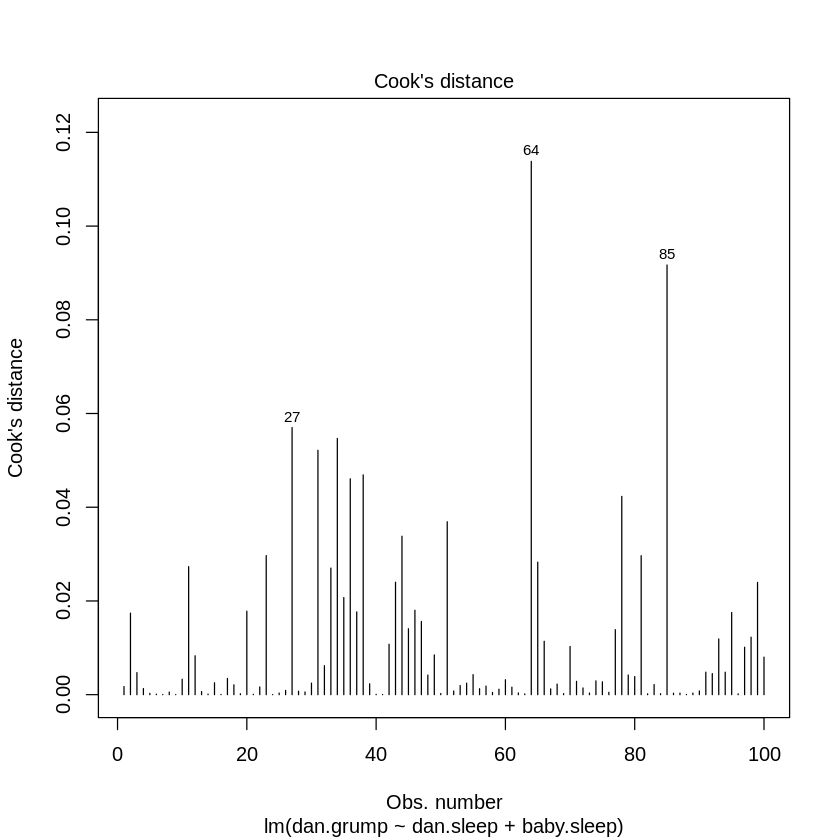

In [19]:
# plot cooks distance
plot(x=regression.2, which=4)

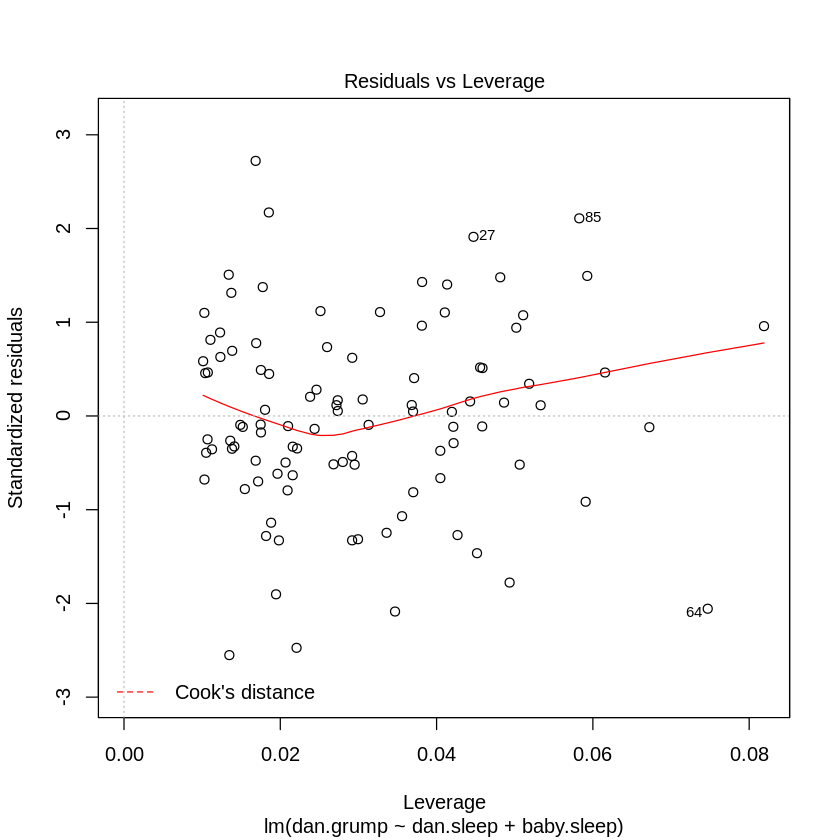

In [20]:
# plot studentised residual against leverage
plot(x=regression.2, which=5)

What to do about large cook's distance?

try excluding it, but if you do that you need a really good reason why. In general, try to figure out WHY it's so different. 

Try deleting the data from day 64

In [21]:
lm(formula=dan.grump~dan.sleep+baby.sleep, # same formula
    data=parenthood, # same dataframe
    subset=-64, # delete observation 64
  )


Call:
lm(formula = dan.grump ~ dan.sleep + baby.sleep, data = parenthood, 
    subset = -64)

Coefficients:
(Intercept)    dan.sleep   baby.sleep  
   126.3553      -8.8283      -0.1319  


very little change in the coefficients

## Checking the normality of the residuals

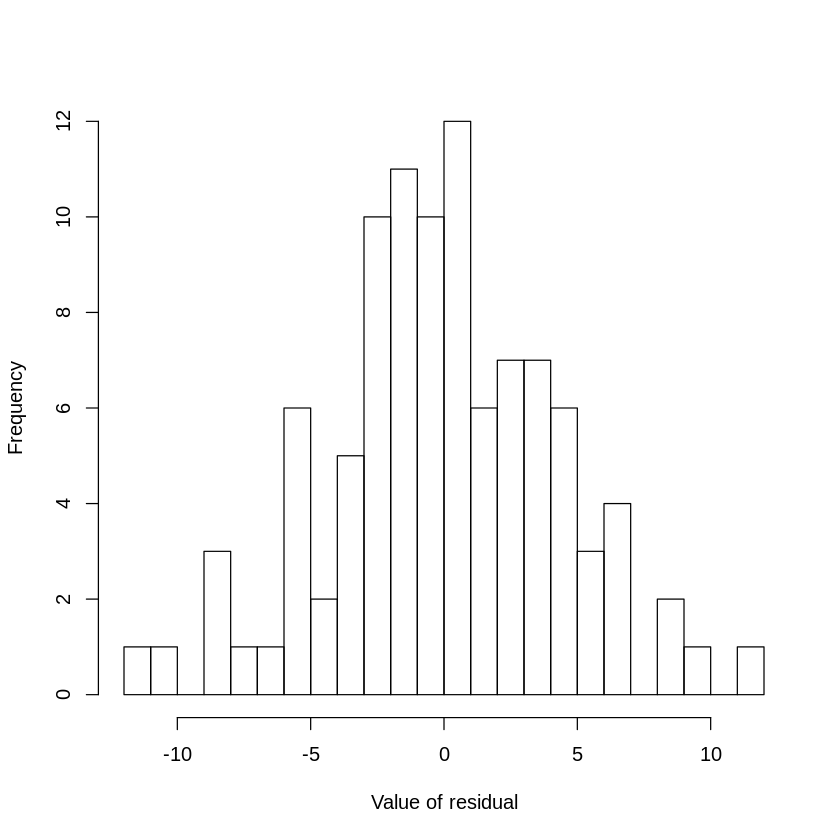

In [22]:
# draw a histogram
hist(x=residuals(regression.2), # data are the residuals
     xlab="Value of residual",
     main="",
     breaks=20
    )

Use Shapiro-wilk test

In [23]:
shapiro.test(residuals(regression.2))


	Shapiro-Wilk normality test

data:  residuals(regression.2)
W = 0.99228, p-value = 0.8414


can also use QQ plot

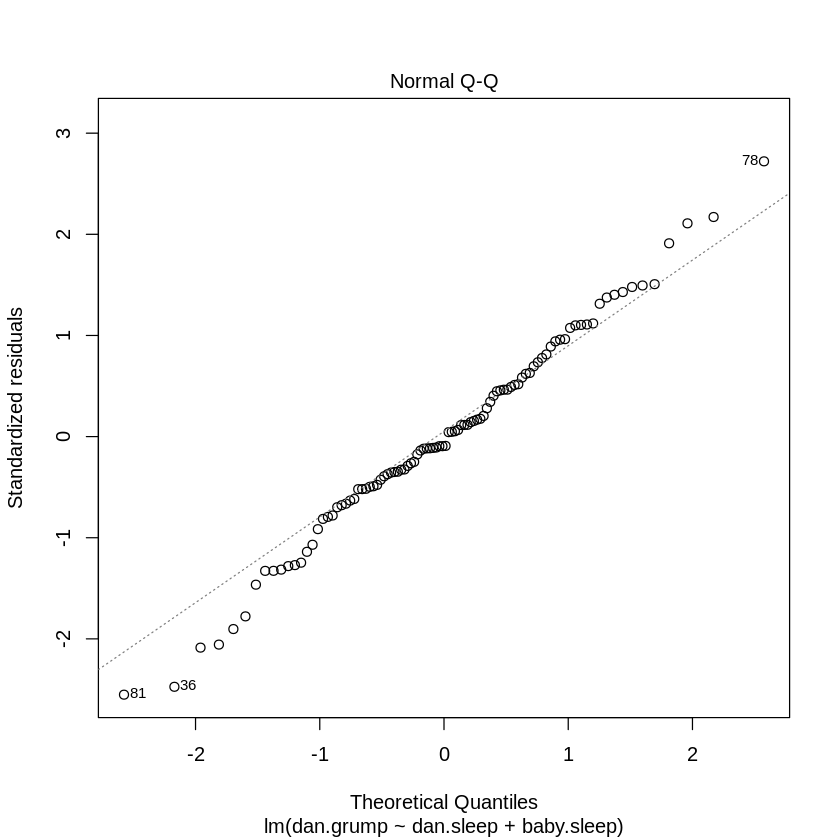

In [24]:
plot(x=regression.2, which=2)

**Checking the linearity of the relationship**

plot relationship between fitted and observed values

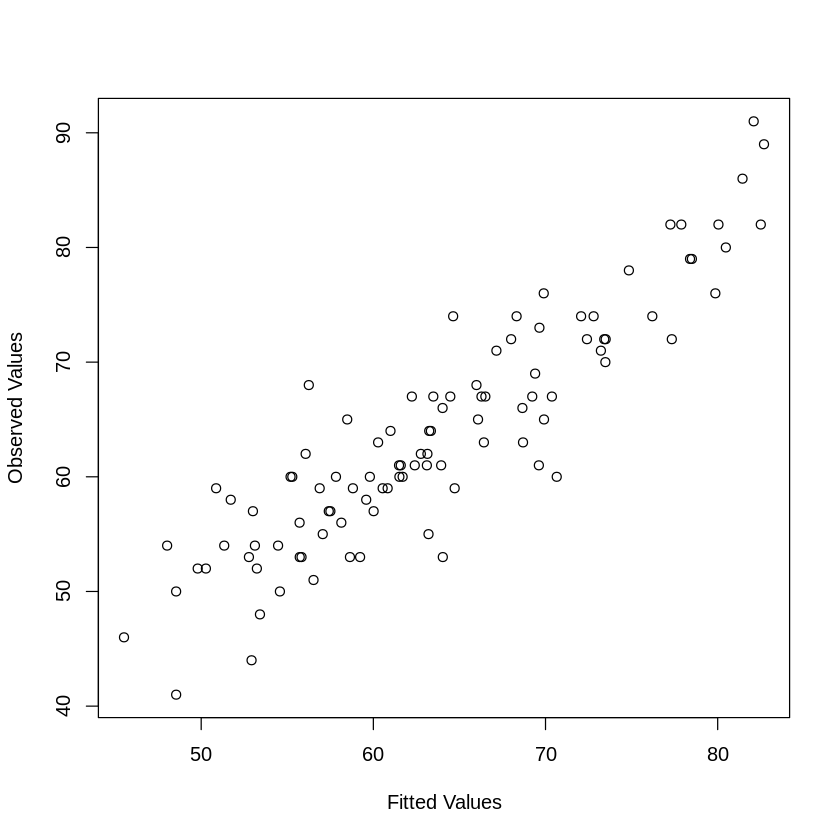

In [25]:
yhat.2 <- fitted.values(object=regression.2)
plot(x=yhat.2,
     y=parenthood$dan.grump,
     xlab="Fitted Values",
     ylab="Observed Values")

As long as this looks somewhat linear, we should be good. 

plot fitted values against residuals

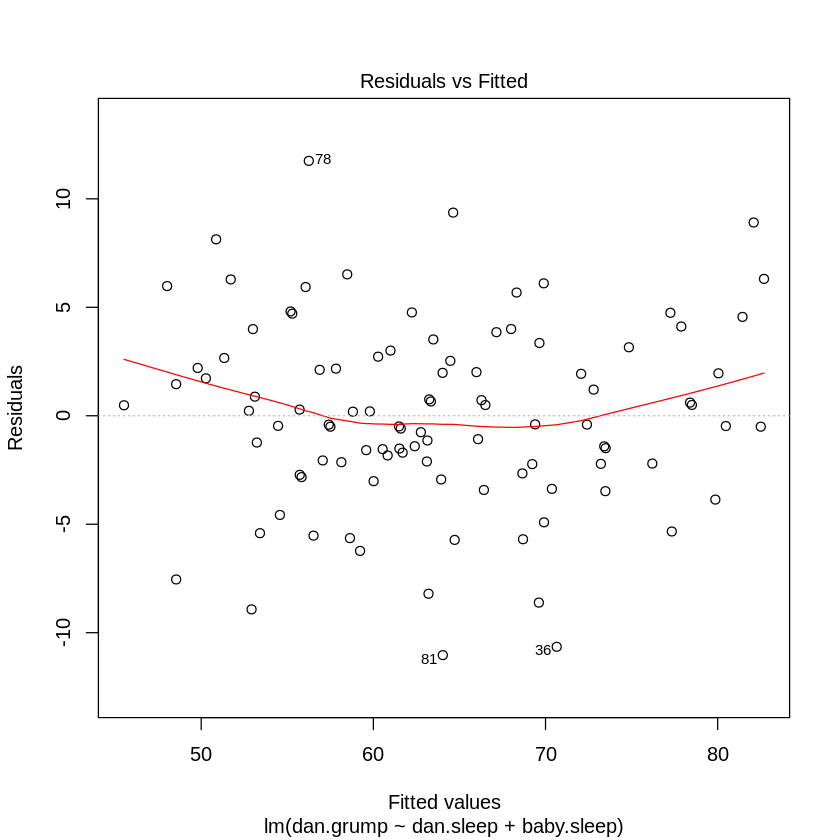

In [26]:
plot(x=regression.2, which=1)

Ideally, the red line is straight and horizontal. 

Can also use `residualPlots` function in car package. 

- also plots results of some curvature tests. For each independent variable, adds the square of that variable and runs a t-test on the b-coefficient. If it is significant, then there might be some nonlinear relationship.


possible solution: transform one of the variables:

Box-Cox transform:
$$
f(x, \lambda) = \frac{x^\lambda-1}{\lambda}
$$

if $\lambda=0$, take natural log


use `boxCox()` in car package


if normalizing, use `powerTransform()` to estimate best value of $\lambda$

**Checking the homogeneity of variance**

plot square root of residuals vs fitted value

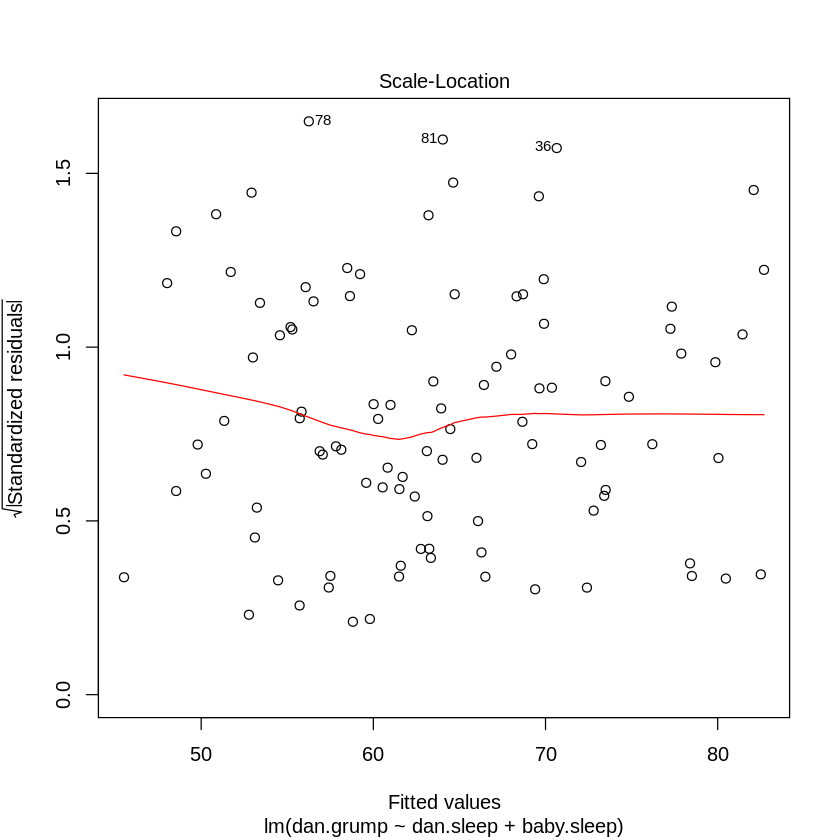

In [27]:
plot(x=regression.2, which=3)

use hypothesis test: `ncvTest()` in car (non-constant variance test)

run a regression to see if there's any relationship between residuals and fitted values. 


If homogeneity of variance is violated: standard error with coefficients isnt completely reliable. Try using 'heteroscedasticity corrected covariance matrix'- Sandwich estimators (it gets a little complicated after this)

**Checking for collinearity**

Variance of inflation factors- whether or not the predictors are too highly correlated with each other

$$
\text{VIF}_k = \frac{1}{1-R^2_{(-k)}}
$$

where $-R^2_{(-k)}$ si the R2 value you would get using $X_k$ as the outcome variable and all the other Xs as predictors. The square root of VIF tells you how much wider the confidence interval for the corresponding coefficient is, relative to what you would have expected if the predictors are completely uncorrelated. 

In [28]:
cor(parenthood)

,dan.sleep,baby.sleep,dan.grump,day
dan.sleep,1.00000000,0.62794934,-0.90338404,-0.09840768
baby.sleep,0.62794934,1.00000000,-0.56596373,-0.01043394
dan.grump,-0.90338404,-0.56596373,1.00000000,0.07647926
day,-0.09840768,-0.01043394,0.07647926,1.00000000


In [30]:
regression.3 <- lm(day~baby.sleep+dan.sleep+dan.grump, parenthood)

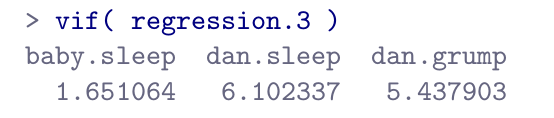

## Model Selection

which variables should we include as predictors and which ones should we exclude?

2 principles:
- it's good to have a substantive basis for your choices. Statistics serves the scientific process, not the other way around. 
- As you add new parameters, the model gets better at absorbing random variations (overfitting). (aka Ockham's razon- do not multiply entities beyond necessity)


Akaike information criterion
$$
\text{AIC} = \frac{\text{SS}_{res}}{\hat \sigma^2} + 2K
$$

smaller AIC = better performance

actual value isn't informative- we're interested in the differences- describes how much better one model is than the other


**Backward elimination**

use `step()` function: start with complete model (all predictors) and try all possible ways of removing one predictor. Accept the one with the lowest AIC score


In [31]:
full.model <- lm(formula=dan.grump~dan.sleep+baby.sleep+day, parenthood)

In [32]:
step(object=full.model, direction="backward")

Start:  AIC=299.08
dan.grump ~ dan.sleep + baby.sleep + day

             Df Sum of Sq    RSS    AIC
- baby.sleep  1       0.1 1837.2 297.08
- day         1       1.6 1838.7 297.16
<none>                    1837.1 299.08
- dan.sleep   1    4909.0 6746.1 427.15

Step:  AIC=297.08
dan.grump ~ dan.sleep + day

            Df Sum of Sq    RSS    AIC
- day        1       1.6 1838.7 295.17
<none>                   1837.2 297.08
- dan.sleep  1    8103.0 9940.1 463.92

Step:  AIC=295.17
dan.grump ~ dan.sleep

            Df Sum of Sq    RSS    AIC
<none>                   1838.7 295.17
- dan.sleep  1    8159.9 9998.6 462.50



Call:
lm(formula = dan.grump ~ dan.sleep, data = parenthood)

Coefficients:
(Intercept)    dan.sleep  
    125.956       -8.937  


Left column: what change R made to the regression model. \<none\> = no change

**Forward selection**

start with smallest model, only consider possible additions. 

Also need to tell step the largest possible model

In [33]:
null.model <- lm(dan.grump~1, parenthood) # intercept only
step(object=null.model, # start with null
     direction = "forward", # only consider 'addition' moves
     scope = dan.grump~dan.sleep+baby.sleep+day # largest model allowed
    )

Start:  AIC=462.5
dan.grump ~ 1

             Df Sum of Sq    RSS    AIC
+ dan.sleep   1    8159.9 1838.7 295.17
+ baby.sleep  1    3202.7 6795.9 425.89
<none>                    9998.6 462.50
+ day         1      58.5 9940.1 463.92

Step:  AIC=295.17
dan.grump ~ dan.sleep

             Df Sum of Sq    RSS    AIC
<none>                    1838.7 295.17
+ day         1   1.55760 1837.2 297.08
+ baby.sleep  1   0.02858 1838.7 297.16



Call:
lm(formula = dan.grump ~ dan.sleep, data = parenthood)

Coefficients:
(Intercept)    dan.sleep  
    125.956       -8.937  


Foudn the same model, although they don't always start and end in the same place. 

**A caveat**


There are many... many tools available for model selection. Trust your instincts. Interpretability matters.

**Comparing two regression models**

Does the amout of sleep that baby got have any relationship to dan's grumpiness? Also, make sure that day measured has no effect. 

check relationship between baby.sleep and dan.grump from the perspective that dan.grump adn day are nuisance variables (i.e. **covariates**) that we want to control for. 

Is `dan.grump ~ dan.sleep + day + baby.sleep` (M1) a better regression model than `dan.grump~dan.sleep+day` (M0)


AIC approach

In [34]:
M0 <- lm(dan.grump~dan.sleep+day, parenthood)
M1 <- lm(dan.grump~dan.sleep+day+baby.sleep, parenthood)

AIC(M0, M1)

,df,AIC
M0,4,582.8681
M1,5,584.8646


Therefore M0 is better

Also think about hypothesis testing framework

M0 contains a subset of the predictors from M1. 

M0 is nested within M1, or M0 is a submodel of M1.

This means M0 is a null hypothesis and M1 is an alternative hypothesis. 

Fit each model and get residual sum of squares for each - then do an F-test

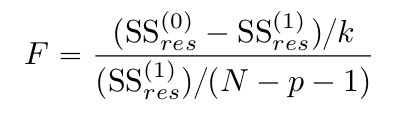

N = number of observations, p = number of predictors, k = difference in number of parameters between the two models. dof = k and N-p-1.  

In [36]:
print(anova(M0, M1))

Analysis of Variance Table

Model 1: dan.grump ~ dan.sleep + day
Model 2: dan.grump ~ dan.sleep + day + baby.sleep
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     97 1837.2                           
2     96 1837.1  1  0.063688 0.0033 0.9541


Since p>0.05, retain the null

Hierarchical regression: add all covariates into a null model, add variables of interest into alternative model, then compare the two models in hypothesis testing framework